# Import packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df1 = pd.read_csv("/Users/DataSci/Desktop/Flatiron/Assignments/Phase_4_Proj/apple_goog.csv", index_col = 0)

In [3]:
df1.head(10)

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet
1,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...
4,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...
5,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...
7,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...
10,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...
13,2020-11-28,Chris Short,chrisshort,0,apple silicon,2,en,recommended read apple silicon developer persp...
14,2020-11-28,Ian W. Yeo,ianyeo,0,apple silicon,1,en,imagining the possibilities with apple silicon...
17,2020-11-28,fabdub,fabdub,0,apple silicon,0,en,cardhop with apple silicon native coming
18,2020-11-28,Markus Rudel,rudelm,0,apple silicon,1,en,interesting blog post on the new apple silicon...
19,2020-11-28,Ahmed Ouardani,ahmedouardani1,0,apple silicon,1,en,before you jump like crazy on new mac chip goo...


In [4]:
df1.reset_index(drop=True, inplace=True)

In [5]:
df1.shape


(678730, 8)

In [6]:
df1.isnull().sum()

date               0
name              38
username           0
retweets_count     0
search_term        0
likes_count        0
language           0
c_tweet            6
dtype: int64

In [7]:
df1.dropna(inplace = True)

In [8]:
df1.describe()

,retweets_count,likes_count
count,678686.000000,678686.000000
mean,1.585172,11.665686
std,56.823221,351.834219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,17446.000000,91917.000000


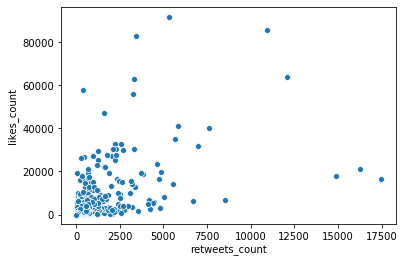

In [9]:
sns.scatterplot(x=df1["retweets_count"], y=df1["likes_count"]);

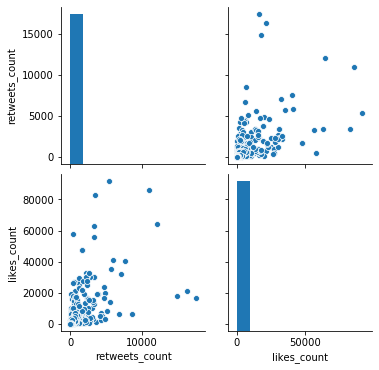

In [10]:
sns.pairplot(df1);

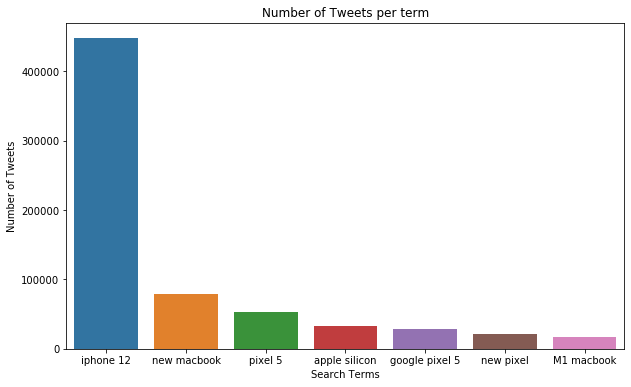

In [11]:
x=df1["search_term"].value_counts().index.to_list()

y = df1["search_term"].value_counts().to_list()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Number of Tweets per term")
plt.xlabel("Search Terms")
plt.ylabel("Number of Tweets");

In [12]:
df = df1.copy()

# Import packages for NLP

In [13]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/DataSci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/DataSci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/DataSci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/DataSci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/DataSci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
df.head()

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...


# Tag Sentiment

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):

    score = analyzer.polarity_scores(sentence)
    

    if score['compound'] >= .05:
        sent = 'positive'

    
    elif score['compound'] <= -.05:
        sent = 'negative'
       
    else:
        sent = 'neutral'
        

    return sent

In [17]:
df['sentiment'] = df.c_tweet.apply(sentiment_analyzer_scores)

In [18]:
df.sentiment.value_counts(normalize=True)

positive    0.461090
neutral     0.385234
negative    0.153676
Name: sentiment, dtype: float64

In [19]:
len(df["c_tweet"])

678686

# Stopwords created

In [20]:
stop_words=list(set(stopwords.words("english")))

In [21]:
stop_words.extend(["ll", "please retweet", "help rt", "visit us", "please subscribe", "for sale", "enter here", "to win", "from iphone", "huge giveaway", "new arrival", "win an", "unlocked now", "new available", "giveaway", "subscribe", "retweet", "easter egg"])

In [22]:

eda_stopwords = ["iphone", "iphone pro", "pro max", "abt", "youtube", "youtuber", "youtubers", "yt", "af", "ah", "ai", "also", "asap", "au", "cu", "de", "dm", "ee", "eh", "el", "em", "io", "ip", "inr", "inc", "ig", 
"ill", "im", "ima", "imma", "id", "huh", "hmmm", "hmm", "hi", "hey", "hello", "hai", "haha", "ha", "gt", "fi", 
"fe", "dy", "dont", "imac", "ipad", "ipadair", "ipads", "iphonecase", "iphonemini", "iphonepro", "iphonepromax", "iphones", "iphoneth", "ipod", 
"ive", "ko", "la", "le", "lmao", "lmfao", "lol", "macbook", "macbookair", "mac", "macbookpro", "macbooks", "macosbigsur", "macmini", "magsafe", 
"ni", "oh", "ok", "okay", "oo", "ooo", "pa", "pd", "pm", "pro", "promax", "rd", "rt", "se", "son", "so", "soo", "sub", "tim", "tl", "tom", "ur", "wa", "wahala", "wan", "wont", 
'ya', "yep", "yo", 'yall','yay','yea','yeah',]

stop_words.extend(eda_stopwords)

In [23]:
stop_words

['own',
 'll',
 'hadn',
 'are',
 'more',
 'again',
 'y',
 'wouldn',
 'who',
 'out',
 "didn't",
 'up',
 'had',
 'but',
 'himself',
 'you',
 'because',
 'is',
 "won't",
 "that'll",
 'after',
 'yourselves',
 'off',
 'not',
 'been',
 'just',
 'having',
 'and',
 'haven',
 't',
 'through',
 'don',
 'over',
 'its',
 'doesn',
 "haven't",
 'other',
 'weren',
 'our',
 'few',
 'with',
 'yourself',
 'ain',
 'no',
 "you've",
 'if',
 'until',
 'between',
 'it',
 'below',
 'has',
 'they',
 'my',
 'me',
 'how',
 'an',
 'can',
 'o',
 'theirs',
 'above',
 'hers',
 'of',
 'here',
 'to',
 "couldn't",
 'she',
 'now',
 're',
 'does',
 's',
 "should've",
 'ourselves',
 'was',
 'some',
 'his',
 'both',
 "hasn't",
 'should',
 'during',
 'each',
 'down',
 'on',
 'needn',
 'didn',
 'm',
 'that',
 'for',
 'then',
 'only',
 'the',
 'so',
 'why',
 'them',
 'further',
 'won',
 'him',
 'whom',
 'aren',
 'where',
 'any',
 'mustn',
 'before',
 "you'd",
 'ma',
 'once',
 'we',
 "hadn't",
 "weren't",
 "shouldn't",
 'ours'

In [24]:
df.drop_duplicates(subset='c_tweet', inplace = True)

In [25]:
len(df["c_tweet"])

459839

# Tokenize, Lemmatize and remove stopwords

In [26]:
import nltk
#tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.tokenize.TweetTokenizer()
#stemming = nltk.stem.PorterStemmer()

In [27]:
def lemmatize_text(text):
     return [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text)]
#    return [stemming.stem(word) for word in tokenizer.tokenize(text)]

In [28]:
#tokenize and lemmatize words
df["cleaned"] = df.c_tweet.apply(lemmatize_text)

In [59]:
# removes stopwords from the cleaned texts
df["not_filtered"] = df['cleaned'].apply(lambda x: [item for item in x if item not in stop_words])

In [30]:
def unlist(x):
    return ", ".join(x)

In [31]:
df["filtered"] = df.filtered.apply(unlist)
#df.drop(columns = ["filtered", "cleaned"], inplace = True)

In [60]:
df.head()

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,sentiment,cleaned,filtered,not_filtered
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,positive,"[borderland, in, on, apple, silicon, yes, yes,...","borderland, apple, silicon, yes, yes, playable","[borderland, apple, silicon, yes, yes, playable]"
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,positive,"[mac, mini, v, mac, pro, interesting, review, ...","mini, v, interesting, review, con, applesilico...","[mini, v, interesting, review, con, applesilic..."
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,positive,"[and, can, only, imagine, what, the, apple, si...","imagine, apple, silicon, capable","[imagine, apple, silicon, capable]"
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,neutral,"[to, repeat, something, said, at, the, debut, ...","repeat, something, said, debut, apple, silicon...","[repeat, something, said, debut, apple, silico..."
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,negative,"[is, not, the, problem, pixel, size, is, the, ...","problem, pixel, size, problem, intel, problem,...","[problem, pixel, size, problem, intel, problem..."


# Seperate DataFrames based on search term

In [61]:
app_sil_df = df[df.search_term=="apple silicon"]
google_pixel_5_df = df[df.search_term=="google pixel 5"]
m1_macbook_df = df[df.search_term=="M1 macbook"]
new_macbook_df = df[df.search_term=="new macbook"]
new_pixel_df = df[df.search_term=="new pixel"]
pixel_5_df = df[df.search_term=="pixel 5"]
iphone_12_df = df[df.search_term=="iphone 12"]


In [62]:
app_frames = [app_sil_df,
m1_macbook_df,
new_macbook_df,
iphone_12_df]

goo_frames = [google_pixel_5_df,
new_pixel_df,
pixel_5_df]

apple_df = pd.concat(app_frames, ignore_index = True)
google_df = pd.concat(goo_frames, ignore_index = True)

In [63]:
apple_df.dtypes

date              object
name              object
username          object
retweets_count     int64
search_term       object
likes_count        int64
language          object
c_tweet           object
sentiment         object
cleaned           object
filtered          object
not_filtered      object
dtype: object

In [36]:
#FreqDist() goes here but idk how to go about it... 
#do we make FreqDist for each row? 
#or can we do it for each sentiment? 
#or for each search term? 

In [37]:
testing = apple_df.filtered

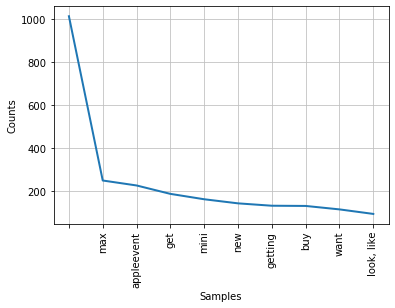

In [38]:
fdist=FreqDist(testing)
fdist.plot(10)

In [64]:
apple_df

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,sentiment,cleaned,filtered,not_filtered
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,positive,"[borderland, in, on, apple, silicon, yes, yes,...","borderland, apple, silicon, yes, yes, playable","[borderland, apple, silicon, yes, yes, playable]"
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,positive,"[mac, mini, v, mac, pro, interesting, review, ...","mini, v, interesting, review, con, applesilico...","[mini, v, interesting, review, con, applesilic..."
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,positive,"[and, can, only, imagine, what, the, apple, si...","imagine, apple, silicon, capable","[imagine, apple, silicon, capable]"
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,neutral,"[to, repeat, something, said, at, the, debut, ...","repeat, something, said, debut, apple, silicon...","[repeat, something, said, debut, apple, silico..."
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,negative,"[is, not, the, problem, pixel, size, is, the, ...","problem, pixel, size, problem, intel, problem,...","[problem, pixel, size, problem, intel, problem..."
...,...,...,...,...,...,...,...,...,...,...,...,...
407110,2020-09-01 00:00:00,Chihibot,chihibot,0,iphone 12,0,en,new restoration project coming on sunday ll fi...,negative,"[new, restoration, project, coming, on, sunday...","new, restoration, project, coming, sunday, fin...","[new, restoration, project, coming, sunday, fi..."
407111,2020-09-01 00:00:00,Yuyo™,alacraneros47,0,iphone 12,0,en,drop the new iphone already phone less face wi...,negative,"[drop, the, new, iphone, already, phone, le, f...","drop, new, already, phone, face, steam, nose","[drop, new, already, phone, face, steam, nose]"
407112,2020-09-01 00:00:00,Grégory Thiell 🧢🌿🚗⚡️,gthiell,0,iphone 12,0,en,ll upgrade my iphone pro max to iphone if they...,neutral,"[ll, upgrade, my, iphone, pro, max, to, iphone...","upgrade, max, found, way, get, rid, notch","[upgrade, max, found, way, get, rid, notch]"
407113,2020-09-01 00:00:00,ずみ@zoomishi,zoomishi,0,iphone 12,0,en,rumor airtags could launch alongside iphone in...,neutral,"[rumor, airtags, could, launch, alongside, iph...","rumor, airtags, could, launch, alongside, seco...","[rumor, airtags, could, launch, alongside, sec..."


In [67]:
apple_tweets = apple_df["not_filtered"]

In [68]:
apple_tweets[:5]

0     [borderland, apple, silicon, yes, yes, playable]
1    [mini, v, interesting, review, con, applesilic...
2                   [imagine, apple, silicon, capable]
3    [repeat, something, said, debut, apple, silico...
4    [problem, pixel, size, problem, intel, problem...
Name: not_filtered, dtype: object

# Bag of Words on the filtered column

In [69]:
import gensim

In [76]:
dictionary = gensim.corpora.Dictionary(apple_tweets)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 50:
        break

0 apple
1 borderland
2 playable
3 silicon
4 yes
5 applesilicon
6 based
7 con
8 going
9 interesting
10 macpro
11 mini
12 monster
13 review
14 v
15 capable
16 imagine
17 continues
18 debut
19 exclusive
20 hard
21 hardware
22 laptop
23 level
24 market
25 offer
26 particularly
27 pc
28 performance
29 repeat
30 said
31 something
32 time
33 back
34 bigger
35 bump
36 fit
37 intel
38 lid
39 pixel
40 problem
41 put
42 sensor
43 size
44 tiny
45 way
46 developer
47 devopsish
48 perspective
49 read
50 recommended


In [78]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [79]:
bow_corpus = [dictionary.doc2bow(doc) for doc in apple_tweets]

In [85]:
bow_corpus[4310]

[(0, 2),
 (2, 2),
 (104, 1),
 (221, 2),
 (226, 1),
 (249, 1),
 (304, 3),
 (311, 1),
 (436, 2),
 (762, 1),
 (918, 1),
 (1083, 1),
 (1236, 1),
 (1494, 1),
 (1950, 1),
 (2479, 1),
 (3471, 1),
 (4904, 1)]

In [82]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
                                                bow_doc_4310[i][1]))


Word 0 ("apple") appears 2 time.
Word 2 ("silicon") appears 2 time.
Word 104 ("actually") appears 1 time.
Word 221 ("make") appears 2 time.
Word 226 ("use") appears 1 time.
Word 249 ("might") appears 1 time.
Word 304 ("much") appears 3 time.
Word 311 ("window") appears 1 time.
Word 436 ("life") appears 2 time.
Word 762 ("people") appears 1 time.
Word 918 ("easier") appears 1 time.
Word 1083 ("harder") appears 1 time.
Word 1236 ("report") appears 1 time.
Word 1494 ("ask") appears 1 time.
Word 1950 ("convinced") appears 1 time.
Word 2479 ("writing") appears 1 time.
Word 3471 ("opposite") appears 1 time.
Word 4904 ("curiosity") appears 1 time.


In [89]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.1054625109690752),
 (1, 0.6986592410652499),
 (2, 0.19391162995687344),
 (3, 0.6805521313034699)]


In [91]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# TFIDF

In [41]:
tf_idf = TfidfVectorizer(min_df=200, stop_words = stop_words)

In [42]:
apple_tfidf = tf_idf.fit_transform(apple_tweets)

/Users/DataSci/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arrival', 'available', 'easter', 'egg', 'enter', 'help', 'huge', 'max', 'new', 'please', 'sale', 'unlocked', 'us', 'visit', 'win'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [43]:
# convert to DataFrame
apple_vec = pd.DataFrame(apple_tfidf.toarray(), columns=tf_idf.get_feature_names())

In [44]:
# look at the first five rows
list_ = apple_vec.columns.to_list()

In [51]:
apple_vec

,aapl,abeg,ability,able,absolute,absolutely,access,accessory,accidentally,according,...,yellow,yeonjun,yes,yesterday,yet,yr,yup,zany,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.933004,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2240 columns after using filtered column
2369 columns after using c_tweet column

After stemming:
2063 columns using filtered column - but words make no sense... 

"af", "ah", "ai", "also", "asap", "au", "cu", "de", "dm", "ee", "eh", "el", "em", "io", "ip", "inr", "inc", "ig", 
"ill", "im", "ima", "imma", "id", "huh", "hmmm", "hmm", "hi", "hey", "hello", "hai", "haha", "ha", "gt", "fi", 
"fe", "dy", "dont", "imac", "ipad", "ipadair", "ipads", "iphonecase", "iphonemini", "iphonepro", "iphonepromax", "iphones", "iphoneth", "ipod", 
"ive", "ko", "la", "le", "lmao", "lmfao", "lol", "macbook", "macbookair", "mac", "macbookpro", "macbooks", "macosbigsur", "macmini", "magsafe", 
"ni", "oh", "ok", "okay", "oo", "ooo", "pa", "pd", "pm", "pro", "promax", "rd", "rt", "se", "son", "so", "soo", "sub", "tim", "tl", "tom", "ur", "wa", "wahala", "wan", "wont", 
'ya', "yep", "yo", 'yall','yay','yea','yeah',

need cleaning: 
    applesilicon, applesiliconm, 

# CountVectorizer

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(lowercase=True,stop_words=stop_words,ngram_range = (1,2))
text_counts= cv.fit_transform(apple_tweets)

In [48]:
x=vectorizer.fit_transform(df["filtered"])

In [49]:
test = pd.DataFrame(x.toarray(), columns = vectorizer.get_feature_names())
test

,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaa,aaaaaaaaaa,aaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,...,zzs,zzupit,zzz,zzzoom,zzzz,zzzzz,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#df.drop(columns=["language", "name", "username"], inplace=True)